# Chapter3 PythonとPolarsを用いたデータ分析と可視化

この教材では、Pythonとデータ分析用ライブラリPolarsを用いてオープンデータを分析、可視化する方法を学びます。具体的には、データの整理、集約、フィルタリング、ソートに加え、基本的な統計量の算出とデータの可視化を行います。




### 初期セットアップ
#### インストール
* hvplot
* holoviews
* requests
* polars

#### GoogleColab で polars plot を動作させる設定
参考情報↓
https://qiita.com/takumasa/items/89b7b279ea10110afec7

In [2]:
%pip -q install -U hvplot holoviews requests

def _render(self, **kwargs):
    # https://github.com/holoviz/holoviews/issues/3551#issuecomment-578394636
    import holoviews as hv
    hv.extension("bokeh")  # type: ignore
    return hv.Store.render(self)

__import__("holoviews").core.Dimensioned._repr_mimebundle_ = _render
%pip -q install -U polars[numpy,plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 44.8 MB/s eta 0:00:00


In [3]:
# ライブラリの import
import requests
import polars as pl

### 韮崎の文化財の csv をダウンロード

In [4]:
URL = "https://www.city.nirasaki.lg.jp/material/files/group/3/bunnkazai1.csv"

res = requests.get(URL)
res.encoding = res.apparent_encoding
with open("sample.csv", "wb") as f:
  f.write(res.content)

### 韮崎の文化財の csv をデータフレームに変換
polars で csv からデータフレームを読み込む場合は read_csv を使用する
今回は文字コードの影響で shift-jis を指定している。encoding で文字コードを指定する。

In [5]:
# 文字コードを shift-jis に指定した。
import polars as pl
df = pl.read_csv("sample.csv",encoding="shift-jis")

### データの整理
polars で必要なデータの絞り込みには主に select と filter を使う。
select は列を選択する命令で簡単な例ではリスト形式で列名を渡すことができる。

In [6]:
# データの整理
# select で列を選ぶことができる。
new_df = df.select(["名称", "種類"])


In [ ]:
# csv から読み込んだあとのデータフレームの状態
df

In [ ]:
# select で列を選んだあとのデータフレーム
new_df

### データの集約
polars で値によってグルーピングする場合は group_by を使用する

以下の例では文化財の種類ごとに総計を算出している

In [ ]:
# データの集約
df.group_by("種類").count()

ここでいったんデータの入れ替えを行う。

新しいデータは韮崎市の人口データである。

In [12]:
# データの入れ替え
URL = "https://www.city.nirasaki.lg.jp/material/files/group/3/192074_population_20230401.csv"

res = requests.get(URL)
with open("jinko.csv", "wb") as f:
  f.write(res.content)
df = pl.read_csv("jinko.csv")

In [ ]:
# 人口データのデータフレーム
df

In [14]:
# select の復習
df.select(["地域名","総人口"])

地域名,総人口
str,i64
"""韮崎""",6818
"""穂坂""",2046
"""藤井""",4729
"""中田""",1360
"""穴山""",1270
…,…
"""清哲""",972
"""神山""",1104
"""旭""",2999


### フィルタリングとソート
polars では行の選択には filter を使用する。

また、ソートには sort を使用する

In [16]:
# 総人口が 1000 人以下の地区を列挙
df.select(["地域名","総人口"]).filter(pl.col("総人口") < 1000)

地域名,総人口
str,i64
"""円野""",741
"""清哲""",972


### 統計情報を取得する
polars では pandas と同様に統計データを一覧する方法がある。

In [18]:
# describe
df.describe()

statistic,都道府県コード又は市区町村コード,地域コード,都道府県名,市区町村名,調査年月日,地域名,総人口,男性,女性,0-4歳の男性,0-4歳の女性,5-9歳の男性,5-9歳の女性,10-14歳の男性,10-14歳の女性,15-19歳の男性,15-19歳の女性,20-24歳の男性,20-24歳の女性,25-29歳の男性,25-29歳の女性,30-34歳の男性,30-34歳の女性,35-39歳の男性,35-39歳の女性,40-44歳の男性,40-44歳の女性,45-49歳の男性,45-49歳の女性,50-54歳の男性,50-54歳の女性,55-59歳の男性,55-59歳の女性,60-64歳の男性,60-64歳の女性,65-69歳の男性,65-69歳の女性,70-74歳の男性,70-74歳の女性,75-79歳の男性,75-79歳の女性,80-84歳の男性,80-84歳の女性,85歳以上の男性,85歳以上の女性,世帯数,備考
str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",11.0,"""0""","""11""","""11""","""11""","""11""",11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,"""0"""
"""null_count""",0.0,"""11""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""11"""
"""mean""",192074.0,null,null,null,null,null,2564.090909,1285.909091,1278.181818,38.363636,33.818182,44.909091,40.181818,53.909091,49.090909,62.454545,58.363636,65.818182,56.545455,72.363636,49.545455,67.0,54.545455,64.363636,58.636364,79.545455,66.090909,91.0,86.818182,100.818182,94.363636,88.363636,95.272727,90.545455,86.454545,91.272727,88.363636,100.818182,112.0,74.181818,88.454545,53.272727,65.090909,46.909091,94.545455,1162.090909,null
"""std""",0.0,null,null,null,null,null,1875.693389,952.713331,923.597295,38.518237,34.298158,40.257806,35.490332,44.702247,41.869928,46.424915,44.353743,57.365178,40.389017,71.059514,40.212843,55.2811,47.246934,58.963163,48.65444,66.828682,55.042628,74.736872,75.358899,73.792707,75.583428,67.200108,61.61995,55.667519,53.290456,53.27493,53.224567,63.136072,71.607262,43.503605,61.371595,37.624702,48.479799,31.053034,64.405533,872.130776,null
"""min""",192074.0,null,"""山梨県""","""韮崎市""","""2023/4/1""","""中田""",741.0,356.0,385.0,6.0,4.0,6.0,6.0,12.0,7.0,14.0,9.0,13.0,18.0,15.0,6.0,13.0,12.0,9.0,10.0,19.0,18.0,24.0,19.0,27.0,15.0,19.0,28.0,32.0,33.0,36.0,32.0,35.0,45.0,31.0,37.0,17.0,24.0,18.0,45.0,356.0,null
"""25%""",192074.0,null,null,null,null,null,1270.0,631.0,639.0,11.0,12.0,18.0,17.0,26.0,21.0,31.0,30.0,26.0,26.0,27.0,21.0,28.0,21.0,28.0,30.0,37.0,26.0,39.0,36.0,41.0,43.0,45.0,55.0,46.0,47.0,52.0,51.0,56.0,60.0,46.0,45.0,29.0,33.0,31.0,59.0,594.0,null
"""50%""",192074.0,null,null,null,null,null,2046.0,1003.0,1043.0,24.0,15.0,25.0,21.0,30.0,35.0,43.0,45.0,53.0,39.0,42.0,39.0,44.0,35.0,32.0,39.0,53.0,41.0,53.0,56.0,89.0,75.0,69.0,79.0,70.0,74.0,83.0,83.0,97.0,104.0,75.0,85.0,45.0,54.0,36.0,80.0,937.0,null
"""75%""",192074.0,null,null,null,null,null,3463.0,1782.0,1681.0,60.0,52.0,72.0,53.0,73.0,60.0,96.0,89.0,103.0,94.0,105.0,76.0,88.0,73.0,87.0,77.0,116.0,96.0,140.0,127.0,154.0,160.0,137.0,142.0,133.0,123.0,126.0,111.0,123.0,136.0,102.0,120.0,70.0,80.0,59.0,111.0,1532.0,null
"""max""",192074.0,null,"""山梨県""","""韮崎市""","""2023/4/1""","""龍岡""",6818.0,3463.0,3355.0,114.0,107.0,117.0,106.0,157.0,144.0,153.0,141.0,187.0,129.0,243.0,130.0,179.0,142.0,190.0,155.0,229.0,187.0,264.0,258.0,249.0,244.0,241.0,228.0,212.0,200.0,206.0,206.0,262.0,289.0,179.0,243.0,152.0,196.0,129.0,274.0,3257.0,null


### データの可視化
polars ではデータフレームから直接、バーグラフなどグラフ化する機能を持っている。(最近追加されたばかり)

内部では hvplot を使用している。

In [19]:
# データの可視化
df.plot.bar(x="地域名",y="男性")

:Bars   [地域名]   (男性)

以下、例では男性と女性の人口データを分けて、男性の年齢別の人口データをバープロットしている。

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
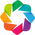

:Bars   [地域名,Variable]   (value)

In [20]:
man = [name for name in df.columns if "男性" in name]
woman = [name for name in df.columns if "女性" in name]
man.insert(0, "地域名")
woman.insert(0, "地域名")
mandata = df.select(man)
womandata = df.select(woman)
mandata = mandata.drop("男性")
m_columns = [name for name in mandata.columns if "男性" in name]
mandata.plot.bar(x="地域名", y=m_columns, stacked=True)

## Chapter 3 課題
### 1. 韮崎の人口データで女性の年齢別のグラフを表示しましょう
### 2. 65 歳位以上を高齢者とし、韮崎の高齢化具合がわかるようなグラフを作成しましょう。
### 3. 韮崎市のほかのデータと人口データを比較し、問題点を見つけてみよう。

韮崎市のオープンデータ

https://www.city.nirasaki.lg.jp/soshikiichiran/somuka/johosuishintanto/1/opendata.html